In [1]:
import pandas as pd

In [2]:
## KAGGLE

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [3]:
# train = pd.read_csv('../input/sentimen-restoran/preprocessed_train.csv')
# test = pd.read_csv('../input/sentimen-restoran/preprocessed_test.csv')

In [4]:
train = pd.read_csv('data/preprocessed_train.csv')
test = pd.read_csv('data/preprocessed_test.csv')

In [5]:
train['sentiment'].value_counts()

1    1200
0     580
Name: sentiment, dtype: int64

In [6]:
train.shape

(1780, 14)

In [7]:
sentiment_to_id = {'positive': 1, 'negative': 0}
id_to_sentiment = {1: 'positive', 0: 'negative'}

### Feature Selection (part 1)

In [8]:
X_test = test['cleaned_text']

X_test_sent_barasa = test[['barasa_total_pos_word', 'barasa_total_neg_word', \
                            'barasa_mean_pos_sentiment_val', 'barasa_mean_neg_sentiment_val']]

# X_test_text_sent_barasa = X_test_sent_barasa.copy() + tfidf vector of cleaned text

X_test_sent_trans = test[['trans_total_pos_word', 'trans_total_neg_word', \
                            'trans_mean_pos_sentiment_val', 'trans_mean_neg_sentiment_val']]

# X_test_text_sent_trans = X_test_sent_trans.copy()+ tfidf vector of cleaned text

y_test = test['sentiment']

### BOW using CountVectorizer

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
# # instantiate the vectorizer
vect = CountVectorizer()

In [11]:
train_vect = vect.fit_transform(train['cleaned_text']).toarray()

In [12]:
train_vect.shape

(1780, 6604)

In [13]:
test_vect = vect.transform(test['cleaned_text']).toarray()

### SMOTE

In [14]:
import numpy as np
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [15]:
train_vect = pd.DataFrame(data=train_vect[0:,0:],
                index=[i for i in range(train_vect.shape[0])],
                columns=['f'+str(i) for i in range(train_vect.shape[1])])

In [16]:
train_vect = train_vect.reset_index(drop=True)
train = train.reset_index(drop=True)

In [17]:
X_train = pd.concat([train_vect, train[['barasa_total_pos_word', 'barasa_total_neg_word', \
                            'barasa_mean_pos_sentiment_val', 'barasa_mean_neg_sentiment_val', \
                            'trans_total_pos_word', 'trans_total_neg_word', \
                            'trans_mean_pos_sentiment_val', 'trans_mean_neg_sentiment_val']]], axis=1, sort=False)

In [18]:
X_train.head()

f0  f1  f2  f3  f4  f5  f6  f7  f8  f9  ...  f6602  f6603  \
0   0   0   0   0   0   0   0   0   0   0  ...      0      0   
1   0   0   0   0   0   0   0   0   0   0  ...      0      0   
2   0   0   0   0   0   0   0   0   0   0  ...      0      0   
3   0   0   0   0   0   0   0   0   0   0  ...      0      0   
4   0   0   0   0   0   0   0   0   0   0  ...      0      0   

   barasa_total_pos_word  barasa_total_neg_word  \
0                     19                     19   
1                      7                     11   
2                      6                      5   
3                      4                      4   
4                     21                     26   

   barasa_mean_pos_sentiment_val  barasa_mean_neg_sentiment_val  \
0                       0.078069                       0.149732   
1                       0.095732                       0.136639   
2                       0.087889                       0.104795   
3                       0.040634                       0.085928   
4                       0.119401                       0.149148   

   trans_total_pos_word  trans_total_neg_word  trans_mean_pos_sentiment_val  \
0                    18                    14                      0.049165   
1                     8                    12                      0.102066   
2                    10                     9                      0.068739   
3                     2                     3                      0.028846   
4                    24                    27                      0.094519   

   trans_mean_neg_sentiment_val  
0                      0.075428  
1                      0.133502  
2                      0.129534  
3                      0.096154  
4                      0.077969  

[5 rows x 6612 columns]

In [19]:
X_train.shape

(1780, 6612)

In [20]:
y_train = train['sentiment']

In [21]:
sm = SMOTE(random_state=1)

X_res, y_res = sm.fit_resample(X_train, y_train)

train = X_res.copy()
train['sentiment'] = y_res

In [22]:
train['sentiment'].value_counts()

1    1200
0    1200
Name: sentiment, dtype: int64

In [23]:
train.head()

f0  f1  f2  f3  f4  f5  f6  f7  f8  f9  ...  f6603  barasa_total_pos_word  \
0   0   0   0   0   0   0   0   0   0   0  ...      0                     19   
1   0   0   0   0   0   0   0   0   0   0  ...      0                      7   
2   0   0   0   0   0   0   0   0   0   0  ...      0                      6   
3   0   0   0   0   0   0   0   0   0   0  ...      0                      4   
4   0   0   0   0   0   0   0   0   0   0  ...      0                     21   

   barasa_total_neg_word  barasa_mean_pos_sentiment_val  \
0                     19                       0.078069   
1                     11                       0.095732   
2                      5                       0.087889   
3                      4                       0.040634   
4                     26                       0.119401   

   barasa_mean_neg_sentiment_val  trans_total_pos_word  trans_total_neg_word  \
0                       0.149732                    18                    14   
1                       0.136639                     8                    12   
2                       0.104795                    10                     9   
3                       0.085928                     2                     3   
4                       0.149148                    24                    27   

   trans_mean_pos_sentiment_val  trans_mean_neg_sentiment_val  sentiment  
0                      0.049165                      0.075428          0  
1                      0.102066                      0.133502          0  
2                      0.068739                      0.129534          0  
3                      0.028846                      0.096154          0  
4                      0.094519                      0.077969          0  

[5 rows x 6613 columns]

In [24]:
train.shape

(2400, 6613)

### Feature Selection (part 2)

In [25]:
train_vect = train.drop(columns=['barasa_total_pos_word', 'barasa_total_neg_word', \
                            'barasa_mean_pos_sentiment_val', 'barasa_mean_neg_sentiment_val', \
                            'trans_total_pos_word', 'trans_total_neg_word', \
                            'trans_mean_pos_sentiment_val', 'trans_mean_neg_sentiment_val', \
                            'sentiment']).to_numpy()

X_train_sent_barasa = train[['barasa_total_pos_word', 'barasa_total_neg_word', \
                            'barasa_mean_pos_sentiment_val', 'barasa_mean_neg_sentiment_val']]

X_train_sent_trans = train[['trans_total_pos_word', 'trans_total_neg_word', \
                            'trans_mean_pos_sentiment_val', 'trans_mean_neg_sentiment_val']]

In [26]:
y_train = train['sentiment']

In [27]:
type(train_vect)

numpy.ndarray

In [28]:
train_vect.shape

(2400, 6604)

In [29]:
X_train = train_vect

X_train_text_sent_barasa = np.concatenate((train_vect, X_train_sent_barasa), axis=1)
X_train_text_sent_trans = np.concatenate((train_vect, X_train_sent_trans), axis=1)

In [30]:
X_test = test_vect
X_test_text_sent_barasa = np.concatenate((test_vect, X_test_sent_barasa), axis=1)
X_test_text_sent_trans = np.concatenate((test_vect, X_test_sent_trans), axis=1)

### Train

In [31]:
# Library for Deep Learning
from keras import backend as K

In [32]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

#### set random seed

In [33]:
import tensorflow as tf

In [34]:
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [35]:
import random
import numpy as np

#### 1. Base Model (using cleaned_text only)

In [36]:
seed_value = 1
num = 38

# Set the `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# Set tensorflow random seed
tf.random.set_seed(num)

In [37]:
X_train.shape

(2400, 6604)

In [38]:
type(X_train)

numpy.ndarray

In [39]:
# Reshaping X_train & X_test
X_train = X_train[:, :, None]
X_test = X_test[:, :, None]

In [40]:
X_train.shape

(2400, 6604, 1)

In [41]:
base_model = Sequential()
base_model.add(LSTM(10, dropout=0.2, input_shape=X_train.shape[1:]))
base_model.add(layers.Dense(8, activation='relu'))
base_model.add(Dropout(0.2))
base_model.add(layers.Dense(1, activation='sigmoid'))

base_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [42]:
base_model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy', f1_m])

In [43]:
EPOCHS = 10
BATCH_SIZE = 1024

history = base_model.fit(X_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.3,
                    verbose=1)

Train on 1680 samples, validate on 720 samples
Epoch 1/10
1680/1680 [==============================] - 16s 9ms/step - loss: 0.6929 - accuracy: 0.5738 - f1_m: 0.6876 - val_loss: 0.6964 - val_accuracy: 0.1403 - val_f1_m: 0.2442
Epoch 2/10
1680/1680 [==============================] - 16s 9ms/step - loss: 0.6915 - accuracy: 0.6548 - f1_m: 0.7929 - val_loss: 0.6998 - val_accuracy: 0.1403 - val_f1_m: 0.2442
Epoch 3/10
1680/1680 [==============================] - 17s 10ms/step - loss: 0.6901 - accuracy: 0.6554 - f1_m: 0.7903 - val_loss: 0.7036 - val_accuracy: 0.1389 - val_f1_m: 0.2439
Epoch 4/10
1680/1680 [==============================] - 17s 10ms/step - loss: 0.6887 - accuracy: 0.6554 - f1_m: 0.7902 - val_loss: 0.7076 - val_accuracy: 0.1389 - val_f1_m: 0.2439
Epoch 5/10
1680/1680 [==============================] - 19s 11ms/step - loss: 0.6868 - accuracy: 0.6554 - f1_m: 0.7926 - val_loss: 0.7119 - val_accuracy: 0.1389 - val_f1_m: 0.2439
Epoch 6/10
1680/1680 [==============================] -

In [44]:
def save_model(model, FILE_NAME):
    # serialize model to YAML
    model_yaml = model.to_yaml()
    with open(FILE_NAME +'.yaml', "w") as yaml_file:
        yaml_file.write(model_yaml)
    # serialize weights to HDF5
    model.save_weights(FILE_NAME +'.h5')
    print("Saved model to disk")

In [45]:
save_model(base_model, 'model/LSTM smote_bow_base')

Saved model to disk


In [46]:
history.history

{'val_loss': [0.6964330077171326,
  0.6998282074928284,
  0.7036193609237671,
  0.7076453566551208,
  0.7119231224060059,
  0.7165169715881348,
  0.7214489579200745,
  0.7267510294914246,
  0.7324863076210022,
  0.738753080368042],
 'val_accuracy': [0.14027777314186096,
  0.14027777314186096,
  0.1388888955116272,
  0.1388888955116272,
  0.1388888955116272,
  0.1388888955116272,
  0.1388888955116272,
  0.1388888955116272,
  0.1388888955116272,
  0.1388888955116272],
 'val_f1_m': [0.2442002147436142,
  0.2442002147436142,
  0.24390242993831635,
  0.24390242993831635,
  0.24390242993831635,
  0.24390242993831635,
  0.24390242993831635,
  0.24390242993831635,
  0.24390242993831635,
  0.24390242993831635],
 'loss': [0.6928519947188241,
  0.6914760714485532,
  0.6900535118012201,
  0.6886995287168594,
  0.6867876694315955,
  0.6850785380318052,
  0.683597731590271,
  0.6814767156328474,
  0.6801960911069598,
  0.6778377413749694],
 'accuracy': [0.5738095,
  0.6547619,
  0.6553571,
  0.65535

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

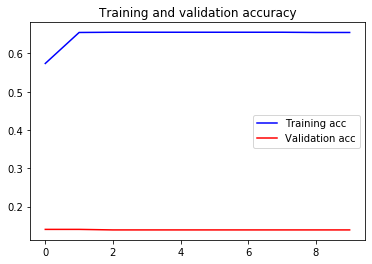

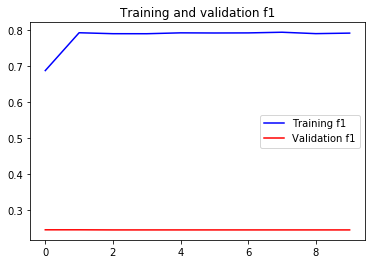

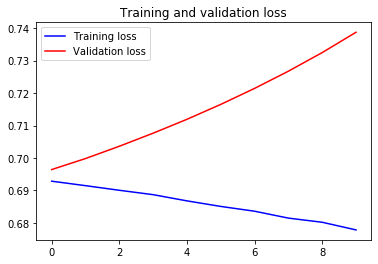

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
f1 = history.history['f1_m']
val_f1 = history.history['val_f1_m']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()

plt.plot(epochs, f1, 'b', label='Training f1')
plt.plot(epochs, val_f1, 'r', label='Validation f1')
plt.title('Training and validation f1')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [49]:
score = base_model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
print()
print("f1:",score[2])
print("accuracy:",score[1])
print("LOSS:",score[0])

185/185 [==============================] - 1s 4ms/step

f1: 0.786885142326355
accuracy: 0.6486486196517944
LOSS: 0.6769484281539917


In [50]:
# predict probabilities for val set
y_pred_probs = base_model.predict(X_test, verbose=0)
# predict crisp classes for val set
y_pred = base_model.predict_classes(X_test, verbose=0)

In [51]:
y_pred

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [52]:
# reduce to 1d array
y_pred_probs = y_pred_probs[:, 0]

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

In [54]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='binary')
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Kappa score: %f' % kappa)

Accuracy: 0.648649
Precision: 0.648649
Recall: 1.000000
F1 score: 0.786885
Kappa score: 0.000000


In [55]:
from sklearn.metrics import confusion_matrix

Text(0.5, 15.0, 'Predicted')

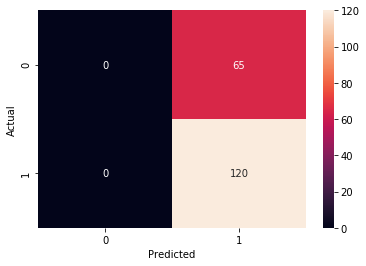

In [56]:
conf_mat = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_mat, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#### 2. Barasa Sentiment Model

In [57]:
seed_value = 1
num = 38

# Set the `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# Set tensorflow random seed
tf.random.set_seed(num)

In [58]:
X_train_sent_barasa.shape

(2400, 4)

In [59]:
type(X_train_sent_barasa)

pandas.core.frame.DataFrame

In [60]:
X_train_sent_barasa = X_train_sent_barasa.to_numpy()
X_test_sent_barasa = X_test_sent_barasa.to_numpy()

In [61]:
type(X_train_sent_barasa)

numpy.ndarray

In [62]:
X_train_sent_barasa.shape

(2400, 4)

In [63]:
# Reshaping X_train & X_test
X_train_sent_barasa = X_train_sent_barasa[:, :, None]
X_test_sent_barasa = X_test_sent_barasa[:, :, None]

In [64]:
X_train_sent_barasa.shape

(2400, 4, 1)

In [65]:
model = Sequential()
model.add(LSTM(10, dropout=0.2, input_shape=X_train_sent_barasa.shape[1:]))
model.add(layers.Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy', f1_m])

In [67]:
EPOCHS = 10
BATCH_SIZE = 1024

history = model.fit(X_train_sent_barasa, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.3,
                    verbose=1)

Train on 1680 samples, validate on 720 samples
Epoch 1/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.7421 - accuracy: 0.4077 - f1_m: 0.3302 - val_loss: 0.6090 - val_accuracy: 0.8611 - val_f1_m: 0.0000e+00
Epoch 2/10
1680/1680 [==============================] - 0s 16us/step - loss: 0.7302 - accuracy: 0.4631 - f1_m: 0.4682 - val_loss: 0.6159 - val_accuracy: 0.8611 - val_f1_m: 0.0000e+00
Epoch 3/10
1680/1680 [==============================] - 0s 22us/step - loss: 0.7288 - accuracy: 0.4512 - f1_m: 0.4517 - val_loss: 0.6229 - val_accuracy: 0.8611 - val_f1_m: 0.0000e+00
Epoch 4/10
1680/1680 [==============================] - 0s 15us/step - loss: 0.7230 - accuracy: 0.4601 - f1_m: 0.4622 - val_loss: 0.6298 - val_accuracy: 0.8611 - val_f1_m: 0.0000e+00
Epoch 5/10
1680/1680 [==============================] - 0s 19us/step - loss: 0.7172 - accuracy: 0.4708 - f1_m: 0.4868 - val_loss: 0.6368 - val_accuracy: 0.8611 - val_f1_m: 0.0000e+00
Epoch 6/10
1680/1680 [=================

In [68]:
save_model(model, 'model/LSTM smote_bow_sent_barasa')

Saved model to disk


In [69]:
history.history

{'val_loss': [0.6089708209037781,
  0.6159170269966125,
  0.6228834390640259,
  0.6298444867134094,
  0.6367695927619934,
  0.6437339186668396,
  0.6507021188735962,
  0.6577475070953369,
  0.6647903323173523,
  0.6718618869781494],
 'val_accuracy': [0.8611111044883728,
  0.8611111044883728,
  0.8611111044883728,
  0.8611111044883728,
  0.8611111044883728,
  0.8611111044883728,
  0.8569444417953491,
  0.8569444417953491,
  0.855555534362793,
  0.862500011920929],
 'val_f1_m': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.019047610461711884,
  0.03738316521048546,
  0.07142855226993561,
  0.1818181425333023],
 'loss': [0.7420740842819213,
  0.7302485988253639,
  0.7287902179218474,
  0.7229870483988807,
  0.7171917160352071,
  0.7166090743882315,
  0.7103706984292893,
  0.7090645279203143,
  0.7025284193810962,
  0.702656044278826],
 'accuracy': [0.4077381,
  0.46309525,
  0.45119047,
  0.46011904,
  0.47083333,
  0.4434524,
  0.46071428,
  0.4434524,
  0.4684524,
  0.43928573],
 'f1_m':

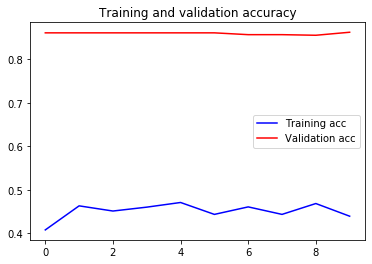

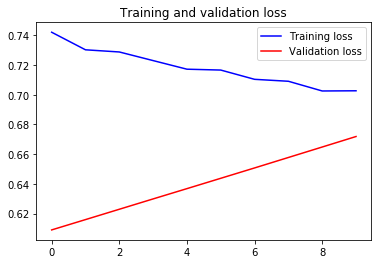

In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
f1 = history.history['f1_m']
val_f1 = history.history['val_f1_m']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()

plt.plot(epochs, f1, 'b', label='Training f1')
plt.plot(epochs, val_f1, 'r', label='Validation f1')
plt.title('Training and validation f1')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [71]:
score = model.evaluate(X_test_sent_barasa, y_test, batch_size=BATCH_SIZE)
print()
print("f1:",score[2])
print("accuracy:",score[1])
print("LOSS:",score[0])

185/185 [==============================] - 0s 88us/step

f1: 0.1230769157409668
accuracy: 0.3837837874889374
LOSS: 0.6981714963912964


In [72]:
# predict probabilities for val set
y_pred_probs = model.predict(X_test_sent_barasa, verbose=0)
# predict crisp classes for val set
y_pred = model.predict_classes(X_test_sent_barasa, verbose=0)

In [73]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [74]:
# reduce to 1d array
y_pred_probs = y_pred_probs[:, 0]

In [75]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='binary')
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Kappa score: %f' % kappa)

Accuracy: 0.383784
Precision: 0.800000
Recall: 0.066667
F1 score: 0.123077
Kappa score: 0.025866


In [76]:
conf_mat = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_mat, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 15.0, 'Predicted')

#### 3. Barasa Sentiment Model + Cleaned Text

In [77]:
seed_value = 1
num = 38

# Set the `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# Set tensorflow random seed
tf.random.set_seed(num)

In [78]:
X_train_text_sent_barasa.shape

(2400, 6608)

In [79]:
type(X_train_text_sent_barasa)

numpy.ndarray

In [80]:
# Reshaping X_train & X_test
X_train_text_sent_barasa = X_train_text_sent_barasa[:, :, None]
X_test_text_sent_barasa = X_test_text_sent_barasa[:, :, None]

In [81]:
X_train_text_sent_barasa.shape

(2400, 6608, 1)

In [82]:
model = Sequential()
model.add(LSTM(10, dropout=0.2, input_shape=X_train_text_sent_barasa.shape[1:]))
model.add(layers.Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy', f1_m])

In [84]:
EPOCHS = 10
BATCH_SIZE = 1024

history = model.fit(X_train_text_sent_barasa, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.3,
                    verbose=1)

Train on 1680 samples, validate on 720 samples
Epoch 1/10
1680/1680 [==============================] - 24s 14ms/step - loss: 0.7422 - accuracy: 0.4077 - f1_m: 0.3302 - val_loss: 0.6079 - val_accuracy: 0.8611 - val_f1_m: 0.0000e+00
Epoch 2/10
1680/1680 [==============================] - 24s 14ms/step - loss: 0.7309 - accuracy: 0.4631 - f1_m: 0.4682 - val_loss: 0.6147 - val_accuracy: 0.8611 - val_f1_m: 0.0000e+00
Epoch 3/10
1680/1680 [==============================] - 22s 13ms/step - loss: 0.7294 - accuracy: 0.4512 - f1_m: 0.4517 - val_loss: 0.6218 - val_accuracy: 0.8611 - val_f1_m: 0.0000e+00
Epoch 4/10
1680/1680 [==============================] - 21s 13ms/step - loss: 0.7235 - accuracy: 0.4601 - f1_m: 0.4622 - val_loss: 0.6291 - val_accuracy: 0.8611 - val_f1_m: 0.0000e+00
Epoch 5/10
1680/1680 [==============================] - 15s 9ms/step - loss: 0.7175 - accuracy: 0.4708 - f1_m: 0.4868 - val_loss: 0.6364 - val_accuracy: 0.8611 - val_f1_m: 0.0000e+00
Epoch 6/10
1680/1680 [============

In [85]:
save_model(model, 'model/LSTM smote_bow_text_sent_barasa')

Saved model to disk


In [86]:
history.history

{'val_loss': [0.6079381108283997,
  0.6147177219390869,
  0.6218157410621643,
  0.6290598511695862,
  0.6363601684570312,
  0.643767237663269,
  0.6512334942817688,
  0.6587800979614258,
  0.6664243340492249,
  0.6741445064544678],
 'val_accuracy': [0.8611111044883728,
  0.8611111044883728,
  0.8611111044883728,
  0.8611111044883728,
  0.8611111044883728,
  0.862500011920929,
  0.8569444417953491,
  0.8597221970558167,
  0.855555534362793,
  0.8541666865348816],
 'val_f1_m': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.019801978021860123,
  0.019047610461711884,
  0.07339448481798172,
  0.08771927654743195,
  0.18604648113250732],
 'loss': [0.7421976254099891,
  0.730904639902569,
  0.7294258889697847,
  0.7234970796675909,
  0.7174517671267192,
  0.7166800090244838,
  0.7101310781070165,
  0.7085330440884545,
  0.7018693736621312,
  0.7015778342882792],
 'accuracy': [0.4077381,
  0.46309525,
  0.45119047,
  0.46011904,
  0.47083333,
  0.4434524,
  0.46071428,
  0.4434524,
  0.4684524,
  0.44

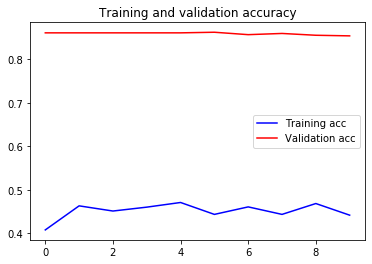

In [87]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
f1 = history.history['f1_m']
val_f1 = history.history['val_f1_m']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()

plt.plot(epochs, f1, 'b', label='Training f1')
plt.plot(epochs, val_f1, 'r', label='Validation f1')
plt.title('Training and validation f1')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [88]:
score = model.evaluate(X_test_text_sent_barasa, y_test, batch_size=BATCH_SIZE)
print()
print("f1:",score[2])
print("accuracy:",score[1])
print("LOSS:",score[0])

185/185 [==============================] - 1s 4ms/step

f1: 0.16417907178401947
accuracy: 0.39459457993507385
LOSS: 0.6972028017044067


In [89]:
# predict probabilities for val set
y_pred_probs = model.predict(X_test_text_sent_barasa, verbose=0)
# predict crisp classes for val set
y_pred = model.predict_classes(X_test_text_sent_barasa, verbose=0)

In [90]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [91]:
# reduce to 1d array
y_pred_probs = y_pred_probs[:, 0]

In [92]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='binary')
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Kappa score: %f' % kappa)

Accuracy: 0.394595
Precision: 0.785714
Recall: 0.091667
F1 score: 0.164179
Kappa score: 0.033131


Text(0.5, 15.0, 'Predicted')

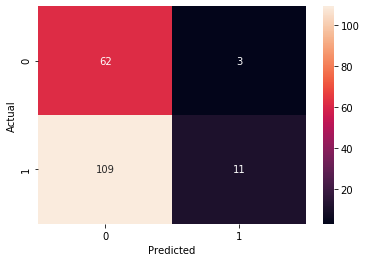

In [93]:
conf_mat = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_mat, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#### 4. Trans Sentiment Model

In [94]:
seed_value = 1
num = 38

# Set the `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# Set tensorflow random seed
tf.random.set_seed(num)

In [95]:
X_train_sent_trans.shape

(2400, 4)

In [96]:
type(X_train_sent_trans)

pandas.core.frame.DataFrame

In [97]:
X_train_sent_trans = X_train_sent_trans.to_numpy()
X_test_sent_trans = X_test_sent_trans.to_numpy()

In [98]:
type(X_train_sent_trans)

numpy.ndarray

In [99]:
X_train_sent_trans.shape

(2400, 4)

In [100]:
# Reshaping X_train & X_test
X_train_sent_trans = X_train_sent_trans[:, :, None]
X_test_sent_trans = X_test_sent_trans[:, :, None]

In [101]:
X_train_sent_trans.shape

(2400, 4, 1)

In [102]:
model = Sequential()
model.add(LSTM(10, dropout=0.2, input_shape=X_train_sent_trans.shape[1:]))
model.add(layers.Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [103]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy', f1_m])

In [104]:
EPOCHS = 10
BATCH_SIZE = 1024

history = model.fit(X_train_sent_trans, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.3,
                    verbose=1)

Train on 1680 samples, validate on 720 samples
Epoch 1/10
1680/1680 [==============================] - 1s 453us/step - loss: 0.7309 - accuracy: 0.4101 - f1_m: 0.3427 - val_loss: 0.6235 - val_accuracy: 0.8069 - val_f1_m: 0.0795
Epoch 2/10
1680/1680 [==============================] - 0s 14us/step - loss: 0.7219 - accuracy: 0.4762 - f1_m: 0.4950 - val_loss: 0.6300 - val_accuracy: 0.7931 - val_f1_m: 0.1768
Epoch 3/10
1680/1680 [==============================] - 0s 19us/step - loss: 0.7206 - accuracy: 0.4732 - f1_m: 0.5005 - val_loss: 0.6366 - val_accuracy: 0.7736 - val_f1_m: 0.2419
Epoch 4/10
1680/1680 [==============================] - 0s 16us/step - loss: 0.7155 - accuracy: 0.4827 - f1_m: 0.5238 - val_loss: 0.6432 - val_accuracy: 0.7583 - val_f1_m: 0.2564
Epoch 5/10
1680/1680 [==============================] - 0s 35us/step - loss: 0.7093 - accuracy: 0.5071 - f1_m: 0.5619 - val_loss: 0.6498 - val_accuracy: 0.7431 - val_f1_m: 0.2510
Epoch 6/10
1680/1680 [==============================] - 0

In [105]:
save_model(model, 'model/LSTM smote_bow_sent_trans')

Saved model to disk


In [106]:
history.history

{'val_loss': [0.62351393699646,
  0.630031406879425,
  0.6366035342216492,
  0.6432023644447327,
  0.6498019099235535,
  0.6564700603485107,
  0.6631997227668762,
  0.6699592471122742,
  0.6767417192459106,
  0.6835228800773621],
 'val_accuracy': [0.8069444298744202,
  0.793055534362793,
  0.7736111283302307,
  0.7583333253860474,
  0.7430555820465088,
  0.7263888716697693,
  0.7152777910232544,
  0.7097222208976746,
  0.699999988079071,
  0.6972222328186035],
 'val_f1_m': [0.07947015017271042,
  0.17679554224014282,
  0.24186040461063385,
  0.2564102113246918,
  0.2510121166706085,
  0.26217222213745117,
  0.2545454204082489,
  0.25089600682258606,
  0.2499999701976776,
  0.25342461466789246],
 'loss': [0.7309361088843572,
  0.7219484124864851,
  0.7205835813567751,
  0.7155440500804356,
  0.7092555074464707,
  0.7095893002691723,
  0.7043883999188741,
  0.7019694708642505,
  0.6971927489553179,
  0.6965091682615734],
 'accuracy': [0.41011906,
  0.47619048,
  0.4732143,
  0.4827381,
 

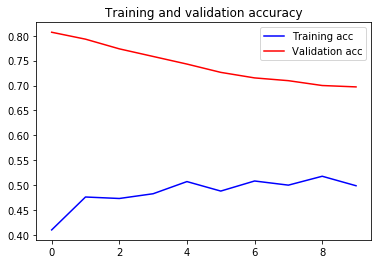

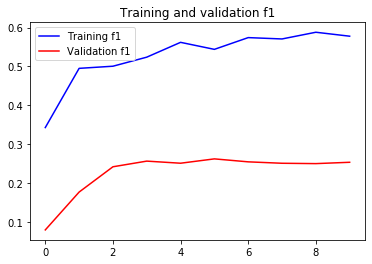

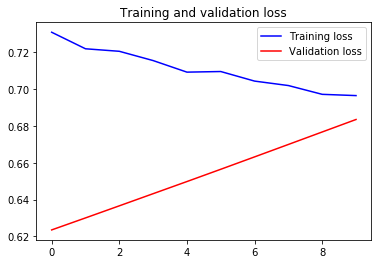

In [107]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
f1 = history.history['f1_m']
val_f1 = history.history['val_f1_m']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()

plt.plot(epochs, f1, 'b', label='Training f1')
plt.plot(epochs, val_f1, 'r', label='Validation f1')
plt.title('Training and validation f1')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [108]:
score = model.evaluate(X_test_sent_trans, y_test, batch_size=BATCH_SIZE)
print()
print("f1:",score[2])
print("accuracy:",score[1])
print("LOSS:",score[0])

185/185 [==============================] - 0s 13us/step

f1: 0.3376622796058655
accuracy: 0.4486486613750458
LOSS: 0.6949636340141296


In [109]:
# predict probabilities for val set
y_pred_probs = model.predict(X_test_sent_trans, verbose=0)
# predict crisp classes for val set
y_pred = model.predict_classes(X_test_sent_trans, verbose=0)

In [110]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [111]:
# reduce to 1d array
y_pred_probs = y_pred_probs[:, 0]

In [112]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='binary')
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Kappa score: %f' % kappa)

Accuracy: 0.448649
Precision: 0.764706
Recall: 0.216667
F1 score: 0.337662
Kappa score: 0.071815


Text(0.5, 15.0, 'Predicted')

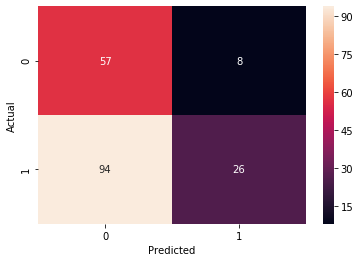

In [113]:
conf_mat = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_mat, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#### 5. Trans Sentiment Model + Cleaned Text

In [114]:
seed_value = 1
num = 38

# Set the `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# Set tensorflow random seed
tf.random.set_seed(num)

In [115]:
X_train_text_sent_trans.shape

(2400, 6608)

In [116]:
type(X_train_text_sent_trans)

numpy.ndarray

In [117]:
# Reshaping X_train & X_test
X_train_text_sent_trans = X_train_text_sent_trans[:, :, None]
X_test_text_sent_trans = X_test_text_sent_trans[:, :, None]

In [118]:
X_train_text_sent_barasa.shape

(2400, 6608, 1)

In [119]:
model = Sequential()
model.add(LSTM(10, dropout=0.2, input_shape=X_train_text_sent_trans.shape[1:]))
model.add(layers.Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_5 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [120]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy', f1_m])

In [121]:
EPOCHS = 10
BATCH_SIZE = 1024

history = model.fit(X_train_text_sent_trans, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.3,
                    verbose=1)

Train on 1680 samples, validate on 720 samples
Epoch 1/10
1680/1680 [==============================] - 19s 11ms/step - loss: 0.7308 - accuracy: 0.4119 - f1_m: 0.3459 - val_loss: 0.6235 - val_accuracy: 0.8056 - val_f1_m: 0.0789
Epoch 2/10
1680/1680 [==============================] - 17s 10ms/step - loss: 0.7218 - accuracy: 0.4804 - f1_m: 0.5034 - val_loss: 0.6305 - val_accuracy: 0.7917 - val_f1_m: 0.1758
Epoch 3/10
1680/1680 [==============================] - 17s 10ms/step - loss: 0.7202 - accuracy: 0.4768 - f1_m: 0.5049 - val_loss: 0.6373 - val_accuracy: 0.7722 - val_f1_m: 0.2545
Epoch 4/10
1680/1680 [==============================] - 18s 11ms/step - loss: 0.7150 - accuracy: 0.4839 - f1_m: 0.5261 - val_loss: 0.6443 - val_accuracy: 0.7500 - val_f1_m: 0.2500
Epoch 5/10
1680/1680 [==============================] - 16s 10ms/step - loss: 0.7085 - accuracy: 0.5095 - f1_m: 0.5669 - val_loss: 0.6513 - val_accuracy: 0.7333 - val_f1_m: 0.2558
Epoch 6/10
1680/1680 [==============================]

In [122]:
save_model(model, 'model/LSTM smote_bow_text_sent_trans')

Saved model to disk


In [123]:
history.history

{'val_loss': [0.6235171556472778,
  0.6304729580879211,
  0.6373190879821777,
  0.6442936062812805,
  0.6512755155563354,
  0.6583653092384338,
  0.6654837727546692,
  0.6726162433624268,
  0.6798209547996521,
  0.6870983242988586],
 'val_accuracy': [0.8055555820465088,
  0.7916666865348816,
  0.7722222208976746,
  0.75,
  0.7333333492279053,
  0.7194444537162781,
  0.7138888835906982,
  0.7097222208976746,
  0.699999988079071,
  0.699999988079071],
 'val_f1_m': [0.07894732058048248,
  0.1758241206407547,
  0.2545454204082489,
  0.2499999701976776,
  0.25581392645835876,
  0.2573528587818146,
  0.2536231279373169,
  0.2562277317047119,
  0.2499999701976776,
  0.2799999415874481],
 'loss': [0.730797929423196,
  0.7218260254178729,
  0.7201912334987095,
  0.7150252864474342,
  0.7085488472666059,
  0.7086809396743774,
  0.703372433639708,
  0.7007155787377131,
  0.6959594380287897,
  0.694956286180587],
 'accuracy': [0.41190475,
  0.48035714,
  0.47678572,
  0.48392856,
  0.5095238,
  0.

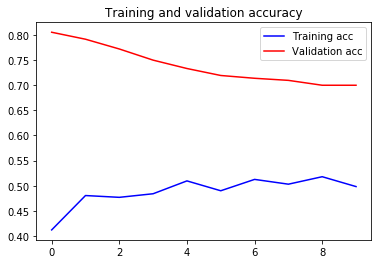

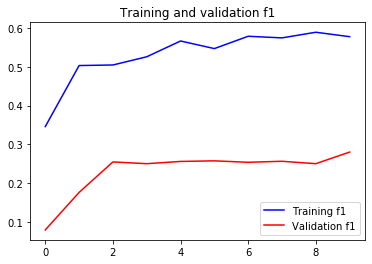

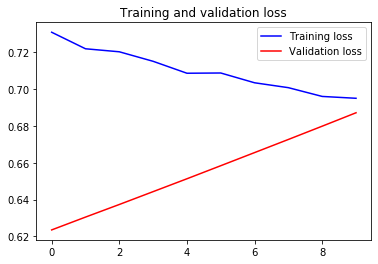

In [124]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
f1 = history.history['f1_m']
val_f1 = history.history['val_f1_m']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()

plt.plot(epochs, f1, 'b', label='Training f1')
plt.plot(epochs, val_f1, 'r', label='Validation f1')
plt.title('Training and validation f1')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [125]:
score = model.evaluate(X_test_text_sent_trans, y_test, batch_size=BATCH_SIZE)
print()
print("f1:",score[2])
print("accuracy:",score[1])
print("LOSS:",score[0])

185/185 [==============================] - 1s 6ms/step

f1: 0.35897430777549744
accuracy: 0.45945945382118225
LOSS: 0.6933987736701965


In [126]:
# predict probabilities for val set
y_pred_probs = model.predict(X_test_text_sent_trans, verbose=0)
# predict crisp classes for val set
y_pred = model.predict_classes(X_test_text_sent_trans, verbose=0)

In [127]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [128]:
# reduce to 1d array
y_pred_probs = y_pred_probs[:, 0]

In [129]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='binary')
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Kappa score: %f' % kappa)

Accuracy: 0.459459
Precision: 0.777778
Recall: 0.233333
F1 score: 0.358974
Kappa score: 0.085064


In [130]:
conf_mat = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_mat, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 15.0, 'Predicted')